# Linear regression example

Here we do the following:

1. Generate synthetic X/y data
2. Solve for optimal $\theta$
3. Plot the results

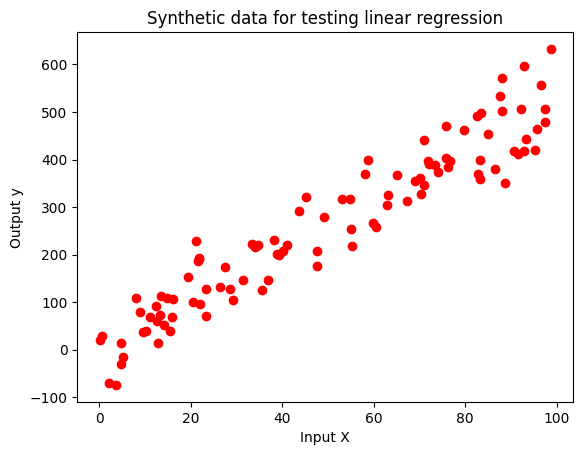

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


theta_true = np.array([[10],[5]])

X = np.random.uniform(0,100,100).reshape(100,1)

X = np.concatenate((np.ones((100,1)),X),axis=1)
y = X @ theta_true + np.random.normal(0,50,(100,1))
#Plot

plt.plot(X[:,1],y,'ro')
plt.xlabel('Input X')
plt.ylabel('Output y')
plt.title('Synthetic data for testing linear regression')
plt.show()

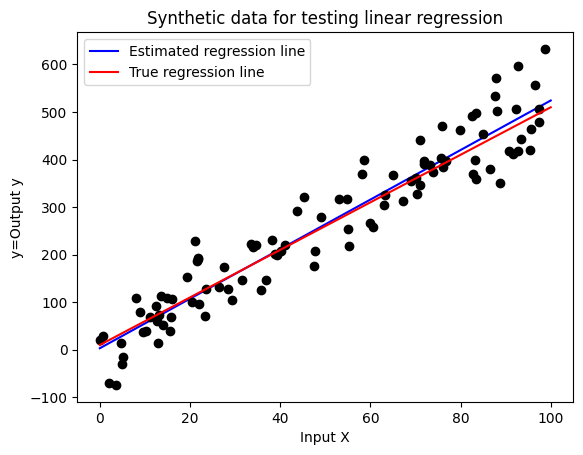

In [ ]:
# A.T@A@w = A.T@y


# w = inv(A.T@A)@A.T@y

theta_star = np.linalg.inv(X.T@X)@X.T@y

x1 = 0
y1 = theta_star[0]

x2 = 100
y2= theta_star[0]+theta_star[1]*x2


plt.plot((x1,x2),(y1,y2),'b-',label="Estimated regression line")

plt.plot(X[:,1],y,'ko')
plt.xlabel('Input X')
plt.ylabel('y=Output y')
plt.title('Synthetic data for testing linear regression')
x1 = 0
y1 = theta_true[0]

x2 = 100
y2= theta_true[0]+theta_true[1]*x2
plt.plot((x1,x2),(y1,y2),'r-',label="True regression line")
plt.legend()
plt.show()


# Group Assignment


Let use learning rate: 0.008
Iteration 0: x = 0.0480, y = -0.0640, f(x, y) = 9.2151
Iteration 5: x = 0.2556, y = -0.3546, f(x, y) = 6.0775
Iteration 10: x = 0.4179, y = -0.6015, f(x, y) = 3.9281
Iteration 15: x = 0.5448, y = -0.8114, f(x, y) = 2.4471
Iteration 20: x = 0.6441, y = -0.9898, f(x, y) = 1.4211
Iteration 25: x = 0.7217, y = -1.1414, f(x, y) = 0.7068
Iteration 30: x = 0.7824, y = -1.2703, f(x, y) = 0.2071
Iteration 35: x = 0.8298, y = -1.3798, f(x, y) = -0.1438
Iteration 40: x = 0.8669, y = -1.4729, f(x, y) = -0.3911
Iteration 45: x = 0.8959, y = -1.5520, f(x, y) = -0.5661
Iteration 50: x = 0.9186, y = -1.6192, f(x, y) = -0.6901
Iteration 55: x = 0.9364, y = -1.6764, f(x, y) = -0.7784
Iteration 60: x = 0.9502, y = -1.7249, f(x, y) = -0.8413
Iteration 65: x = 0.9611, y = -1.7662, f(x, y) = -0.8862
Iteration 70: x = 0.9696, y = -1.8013, f(x, y) = -0.9183
Iteration 75: x = 0.9762, y = -1.8311, f(x, y) = -0.9413
Iteration 80: x = 0.9814, y = -1.8565, f(x, y) = -0.9578
Iteration 

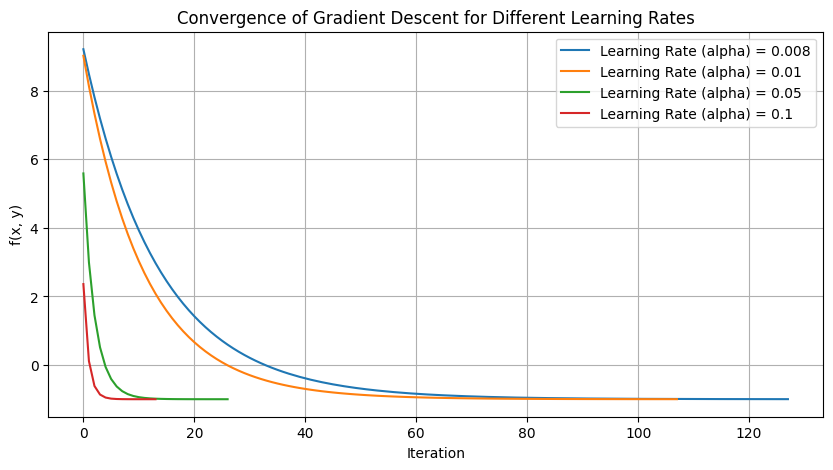

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gradient function for f(x, y) = 3x^2 + 2y^2 - 6x + 8y + 10
def gradient(x, y):
    df_dx = 6 * x - 6
    df_dy = 4 * y + 8
    return np.array([df_dx, df_dy])

# Define the gradient descent function with overflow safeguard
def gradient_descent(alpha, start_point, max_iters, tol):
    x, y = start_point
    f_vals = []  # Store function values for visualization
    for i in range(max_iters):
        grad = gradient(x, y)
        new_x = x - alpha * grad[0]
        new_y = y - alpha * grad[1]

        # Check for overflow by limiting the values of f
        f_value = 3 * new_x ** 2 + 2 * new_y ** 2 - 6 * new_x + 8 * new_y + 10
        if f_value > 1e10:  # Safeguard against overflow
            print(f"Stopping early due to large function value at iteration {i}.")
            return new_x, new_y, i, f_vals

        # Check for convergence
        if np.abs(new_x - x) < tol and np.abs(new_y - y) < tol:
            print(f"Converged after {i} iterations:")
            return new_x, new_y, i, f_vals

        # Update the points
        x, y = new_x, new_y
        f_vals.append(f_value)

        # Print the progress every 5 iterations
        if i % 5 == 0:
            print(f"Iteration {i}: x = {x:.4f}, y = {y:.4f}, f(x, y) = {f_value:.4f}")

    print("Maximum iterations reached without convergence.")
    return x, y, max_iters, f_vals

# Set parameters for gradient descent
start_point = (0, 0)
max_iters = 1000
tol = 0.001
learning_rates = [0.008, 0.01, 0.05, 0.1]

# Plot the function values for different learning rates
plt.figure(figsize=(10, 5))
for alpha in learning_rates:
    print(f"\nLet use learning rate: {alpha}")
    # Run gradient descent
    final_x, final_y, num_iters, f_vals = gradient_descent(alpha, start_point, max_iters, tol)

    # Calculate the final function value
    final_f_value = 3 * final_x ** 2 + 2 * final_y ** 2 - 6 * final_x + 8 * final_y + 10
    print(f"Final x = {final_x:.4f}, Final y = {final_y:.4f}, Final f(x, y) = {final_f_value:.4f}, Iterations = {num_iters}")

    # Plot the function values for this learning rate
    plt.plot(f_vals, label=f'Learning Rate (alpha) = {alpha}')

# Plot settings
plt.xlabel('Iteration')
plt.ylabel('f(x, y)')
plt.title('Convergence of Gradient Descent for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


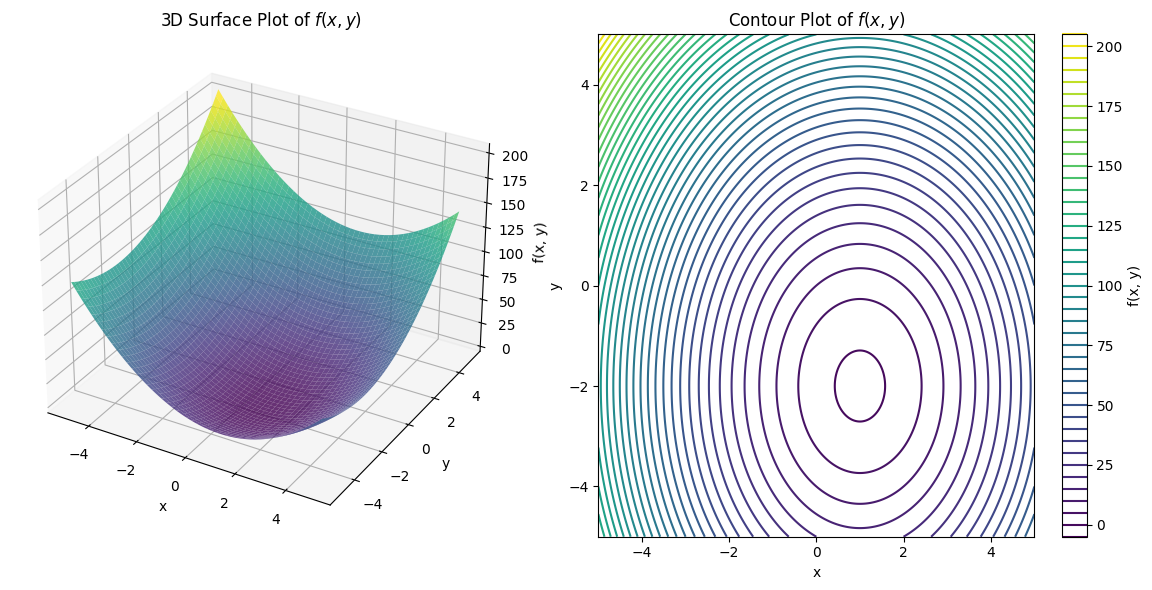

In [11]:

from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x, y) = 3x^2 + 2y^2 - 6x + 8y + 10
def f(x, y):
    return 3 * x ** 2 + 2 * y ** 2 - 6 * x + 8 * y + 10

# Create a meshgrid for x and y
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plotting the 3D surface
fig = plt.figure(figsize=(12, 6))

# 3D surface plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title('3D Surface Plot of $f(x, y)$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')

# 2D contour plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(X, Y, Z, levels=50, cmap='viridis')
ax2.set_title('Contour Plot of $f(x, y)$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(contour, ax=ax2, orientation='vertical', label='f(x, y)')

plt.tight_layout()
plt.show()
